# **Uploading Dataset to Google Drive and Mounting Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
np.random.seed(123)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import missingno as mno
from sklearn import linear_model
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import pylab
import scipy.integrate
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import scipy.special
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [3]:
df =pd.read_csv("drive/My Drive/ColabNotebooks/Datasets/dataset.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0.0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1.0,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1.0,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1.0,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# **Part I: Understanding of the Data Features**

**Unique Values**

In [4]:
#determining the unique values for every column
unique_vals=[]

for i in df.columns:
    unval=df[i].nunique()
    unique_vals.append(unval)
    
pd.DataFrame(unique_vals,index=df.columns,columns=['Unique Values'])

,Unique Values
male,2
age,39
education,4
currentSmoker,2
cigsPerDay,33
BPMeds,2
prevalentStroke,2
prevalentHyp,2
diabetes,2
totChol,248


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4213 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4156 non-null   float64
 10  sysBP            4200 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(10), int64(6)
memory usage: 529.9 KB


In [6]:
#e get to know how skewed is the data
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4213.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4156.000000,4200.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.493473,9.003089,0.029630,0.005899,0.310524,0.025720,236.693936,132.371548,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500017,11.920094,0.169584,0.076587,0.462763,0.158316,44.588367,22.031694,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
group_by_chol = df.groupby('totChol')
group_by_chol.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0.0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1.0,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1.0,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1.0,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4027,1,36,2.0,0.0,0.0,0.0,0,1,0,153.0,143.0,87.0,28.30,63.0,82.0,0
4048,0,59,2.0,0.0,0.0,0.0,0,0,0,345.0,NaN,95.0,23.72,79.0,60.0,0
4055,1,44,2.0,1.0,20.0,0.0,0,0,0,311.0,115.0,80.0,25.43,68.0,90.0,0
4066,1,47,2.0,1.0,20.0,0.0,0,0,0,119.0,117.0,78.5,26.40,75.0,78.0,0


In [8]:
group_by_stroke = df.groupby('prevalentStroke')
group_by_stroke.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0.0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1.0,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1.0,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1.0,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
255,0,60,1.0,0.0,0.0,1.0,1,1,0,252.0,189.0,110.0,28.77,54.0,70.0,0
475,1,53,3.0,1.0,15.0,0.0,1,0,0,161.0,116.0,74.5,19.82,80.0,90.0,0
646,1,38,2.0,0.0,0.0,0.0,1,0,0,224.0,127.5,81.0,20.39,80.0,90.0,0
763,0,58,1.0,0.0,0.0,0.0,1,1,1,267.0,157.0,94.0,33.32,92.0,205.0,1
1044,0,65,1.0,0.0,0.0,NaN,1,1,0,290.0,144.0,64.0,21.41,58.0,145.0,1


#**Visualize the missing Values Clearly**

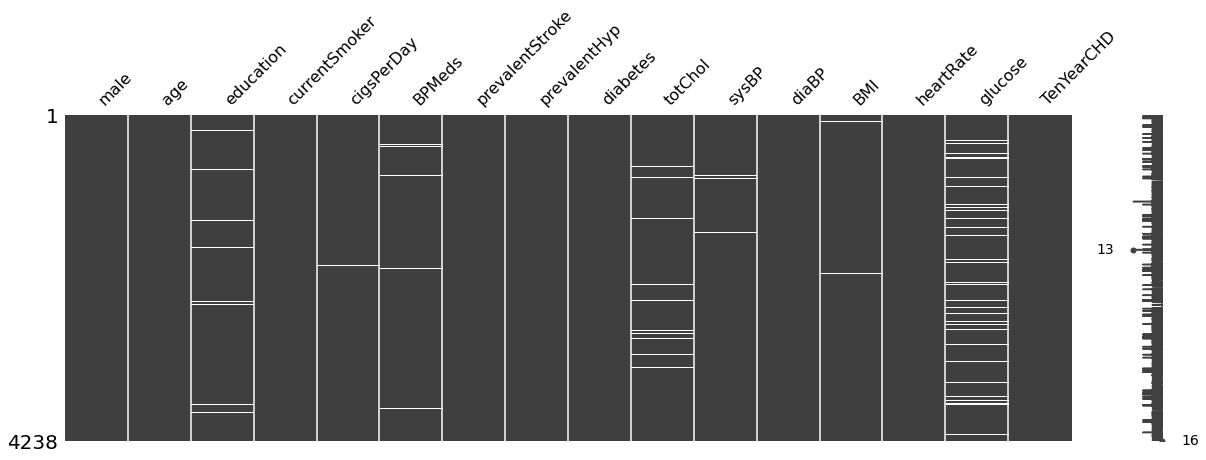

In [9]:
mno.matrix(df, figsize = (20, 6))
# we can see visually which features we having missing values
# education, cigsPerDay,BPMeds, totChol, sysBP, BMI, Heart Rate, glucose have missing values and we need to address missing values
# We will use DATA IMPUTATION BY LINEAR REGRESSION AS A WAY TO HANDLE MISSING VALUES


# **How many missing values in each features**?

In [10]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker       25
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             82
sysBP               38
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# **Check for Duplicated Values**

In [11]:
df.duplicated().sum()

0

# **Handling Missing Values via Data IMPUTATION method using LINEAR REGRESSION**

In [12]:
def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

In [13]:
missing_columns = ["education", "currentSmoker","cigsPerDay","BPMeds","totChol","sysBP","BMI","heartRate","glucose"]

In [14]:
for feature in missing_columns:
    df[feature + '_imp'] = df[feature]
    df = random_imputation(df, feature)

In [15]:
deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:
        
    deter_data["Det" + feature] = df[feature + "_imp"]
    parameters = list(set(df.columns) - set(missing_columns) - {feature + '_imp'})
    
    #Create a Linear Regression model to estimate the missing data
    model = linear_model.LinearRegression()
    model.fit(X = df[parameters], y = df[feature + '_imp'])
    
    #observe that I preserve the index of the missing data from the original dataframe
    deter_data.loc[df[feature].isnull(), "Det" + feature] = model.predict(df[parameters])[df[feature].isnull()]

In [16]:
# we are going to use imputated columns which we have found using linear regression
df.drop('education', inplace=True, axis=1)
df.drop('currentSmoker', inplace=True, axis=1)
df.drop('cigsPerDay', inplace=True, axis=1)
df.drop('BPMeds', inplace=True, axis=1)
df.drop('totChol', inplace=True, axis=1)
df.drop('sysBP', inplace=True, axis=1)
df.drop('BMI', inplace=True, axis=1)
df.drop('heartRate', inplace=True, axis=1)
df.drop('glucose', inplace=True, axis=1)
df.head(5)
dataset=df.copy()

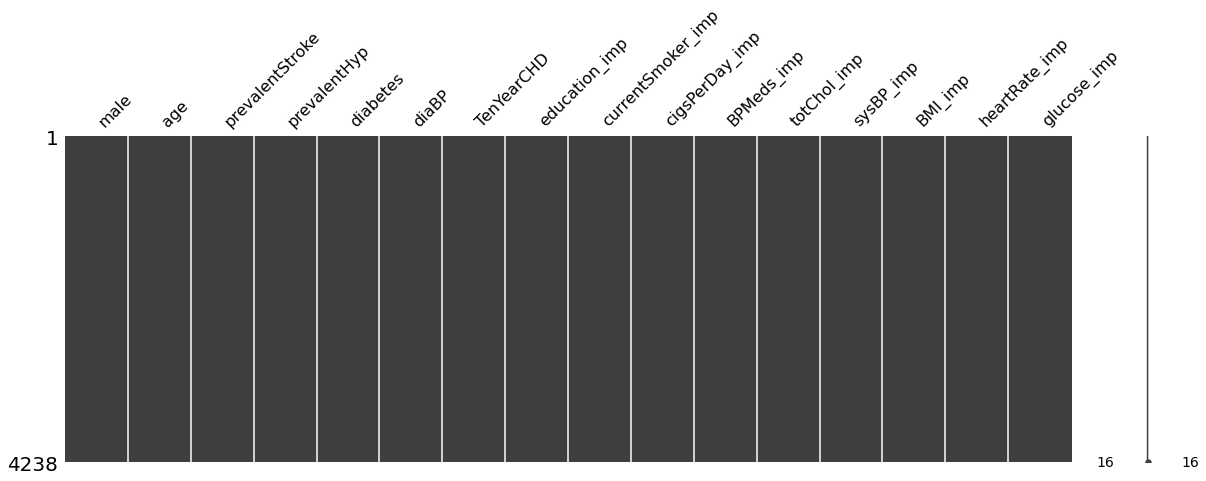

In [17]:
mno.matrix(df, figsize = (20, 6))

In [18]:
df.isnull().sum()

male                 0
age                  0
prevalentStroke      0
prevalentHyp         0
diabetes             0
diaBP                0
TenYearCHD           0
education_imp        0
currentSmoker_imp    0
cigsPerDay_imp       0
BPMeds_imp           0
totChol_imp          0
sysBP_imp            0
BMI_imp              0
heartRate_imp        0
glucose_imp          0
dtype: int64

# **Normalization**

In [19]:
scaler = preprocessing.MinMaxScaler()
names = df.columns
d = scaler.fit_transform(df)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,male,age,prevalentStroke,prevalentHyp,diabetes,diaBP,TenYearCHD,education_imp,currentSmoker_imp,cigsPerDay_imp,BPMeds_imp,totChol_imp,sysBP_imp,BMI_imp,heartRate_imp,glucose_imp
0,1.0,0.184211,0.0,0.0,0.0,0.232804,0.0,1.000000,0.0,0.000000,0.0,0.149406,0.106383,0.277024,0.363636,0.104520
1,0.0,0.368421,0.0,0.0,0.0,0.349206,0.0,0.333333,0.0,0.000000,0.0,0.242784,0.177305,0.319680,0.515152,0.101695
2,1.0,0.421053,0.0,0.0,0.0,0.338624,0.0,0.000000,1.0,0.285714,0.0,0.234295,0.208038,0.237518,0.313131,0.084746
3,0.0,0.763158,0.0,1.0,0.0,0.497354,1.0,0.666667,1.0,0.428571,0.0,0.200340,0.314421,0.316045,0.212121,0.177966
4,0.0,0.368421,0.0,0.0,0.0,0.380952,0.0,0.666667,1.0,0.328571,0.0,0.302207,0.219858,0.183228,0.414141,0.127119


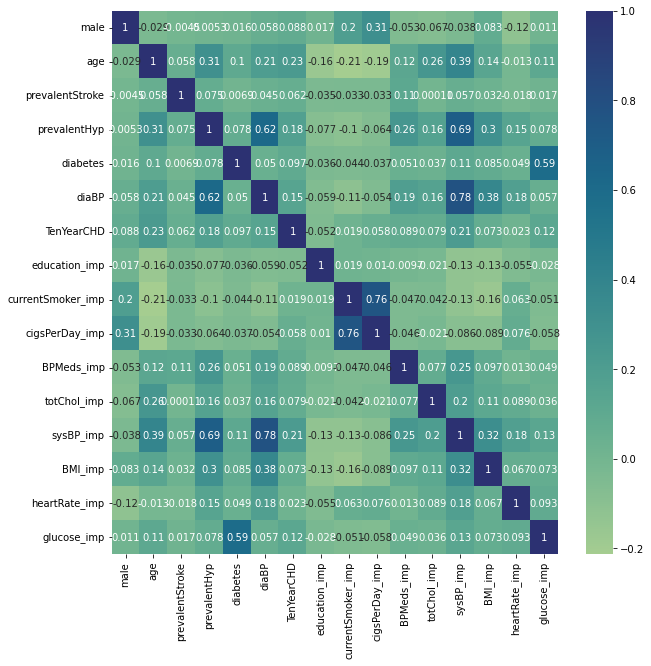

In [20]:
corr=scaled_df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(scaled_df.corr(),annot=True, cmap="crest")

In [21]:
plt.figure(figsize=(5,5))
fig=px.histogram(scaled_df['currentSmoker_imp'],color=scaled_df['male'],labels={'color':'cigsPerDay_imp','value':'male'})
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='blue',width=2)))
fig.update_layout(title_text='Current Smoker per male',title_x=0.5,title_font=dict(size=20))
fig.show()

<Figure size 360x360 with 0 Axes>

In [22]:
plt.figure(figsize=(5,5))
fig=px.histogram(scaled_df['diabetes'],color=scaled_df['education_imp'],labels={'color':'education_imp','value':'diabetes'})
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='blue',width=2)))
fig.update_layout(title_text='education_imp per cigsPerDay_imp',title_x=0.5,title_font=dict(size=20))
fig.show()

<Figure size 360x360 with 0 Axes>

In [23]:
plt.figure(figsize=(5,5))
fig=px.histogram(scaled_df['prevalentHyp'],color=scaled_df['education_imp'],labels={'color':'education_imp','value':'prevalentHyp'})
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='blue',width=2)))
fig.update_layout(title_text='education_imp per prevalentHyp',title_x=0.5,title_font=dict(size=20))
fig.show()

<Figure size 360x360 with 0 Axes>

In [24]:
plt.figure(figsize=(5,5))
fig=px.histogram(scaled_df['BPMeds_imp'],color=scaled_df['education_imp'],labels={'color':'education_imp','value':'BPMeds_imp'})
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='blue',width=2)))
fig.update_layout(title_text='education_imp per BPMeds_imp',title_x=0.5,title_font=dict(size=20))
fig.show()

<Figure size 360x360 with 0 Axes>

In [25]:
plt.figure(figsize=(5,5))
fig=px.histogram(scaled_df['TenYearCHD'],color=scaled_df['education_imp'],labels={'color':'education_imp','value':'TenYearCHD'})
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='blue',width=2)))
fig.update_layout(title_text='education_imp per TenYearCHD',title_x=0.5,title_font=dict(size=20))
fig.show()


<Figure size 360x360 with 0 Axes>

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



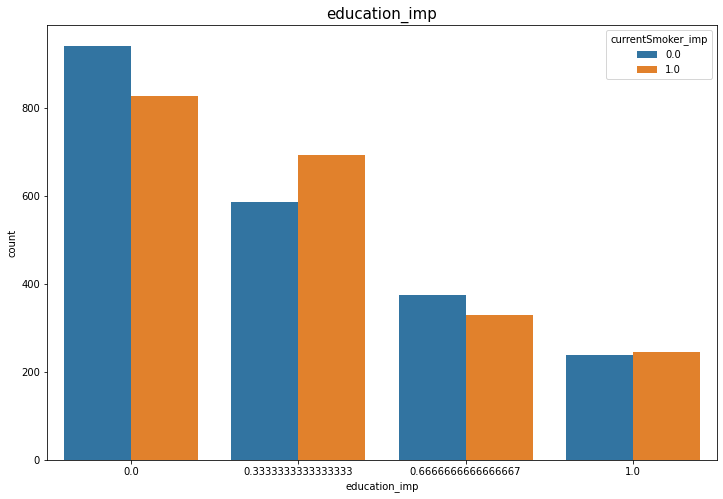

In [26]:
plt.figure(figsize= (12,8))
sns.countplot(scaled_df["education_imp"], hue= scaled_df["currentSmoker_imp"])
plt.title("education_imp",size = 15)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



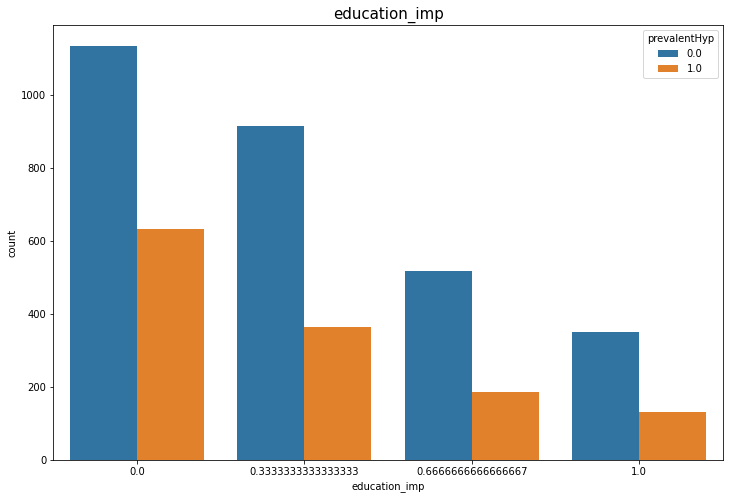

In [27]:
plt.figure(figsize= (12,8))
sns.countplot(scaled_df["education_imp"], hue= scaled_df["prevalentHyp"])
plt.title("education_imp",size = 15)
plt.show()

# **PAIR PLOT**

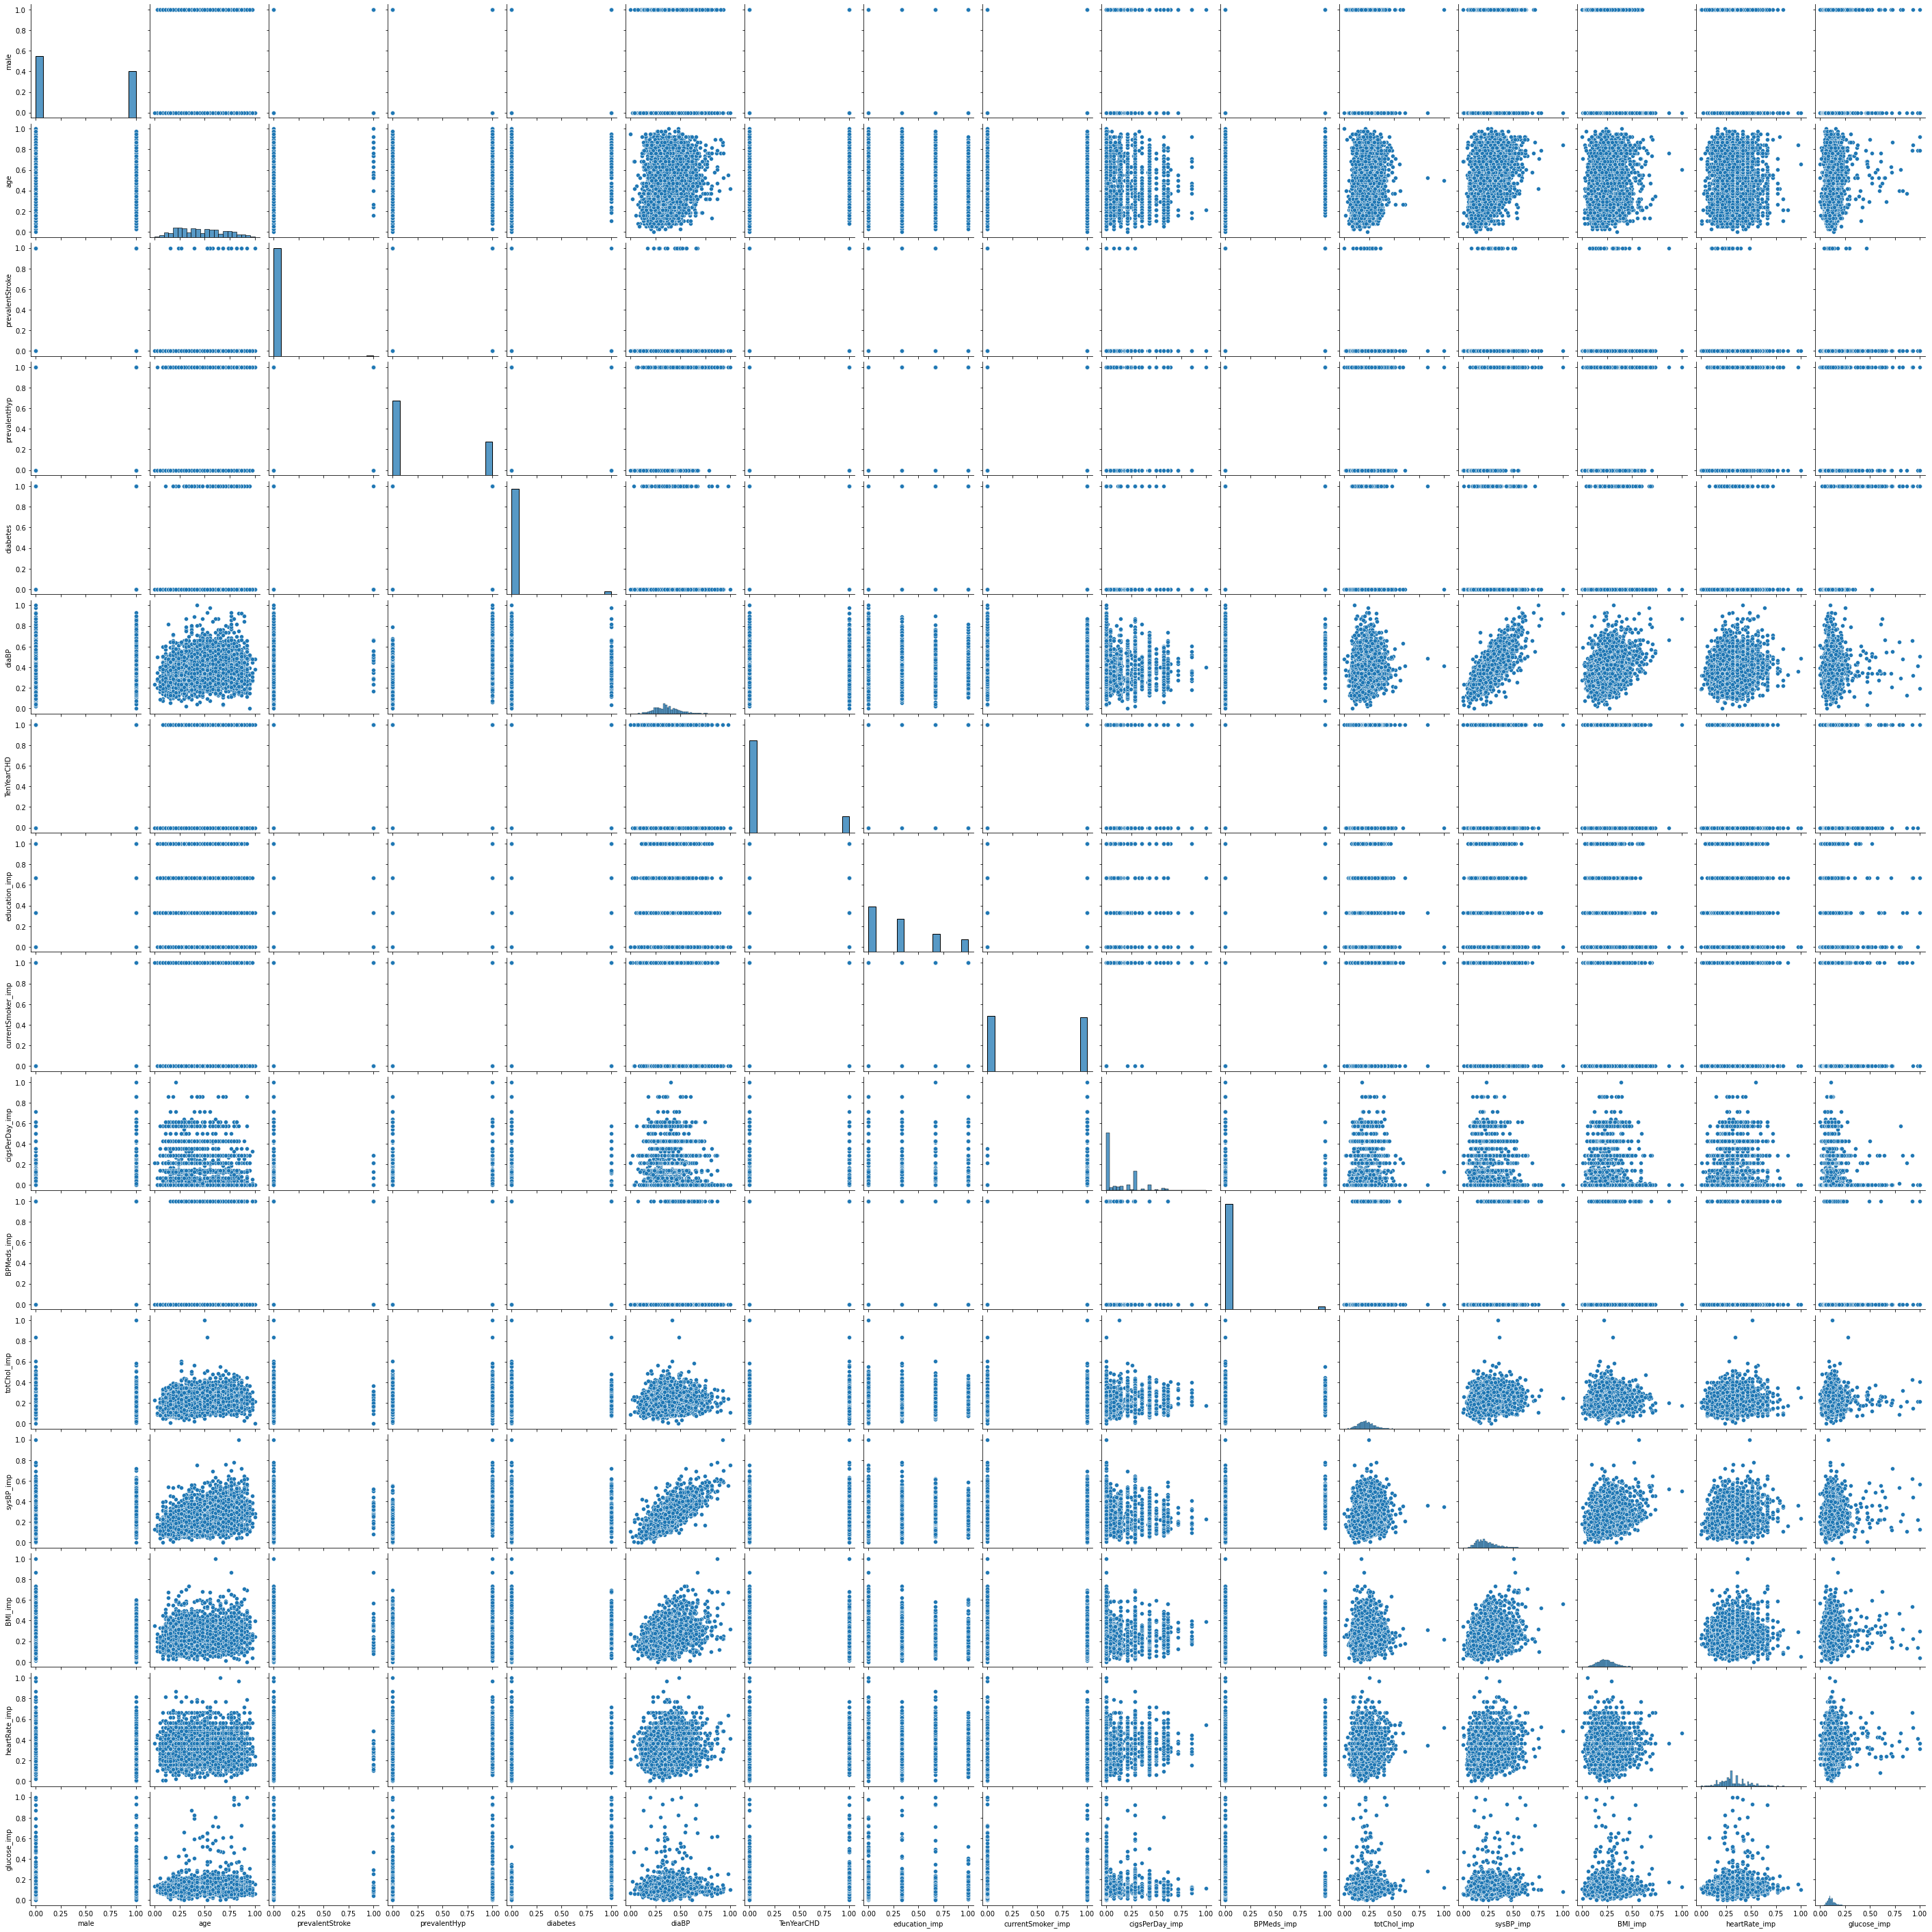

In [28]:
sns.pairplot(scaled_df)

# **Checking Skewness with DISTPLOTS**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



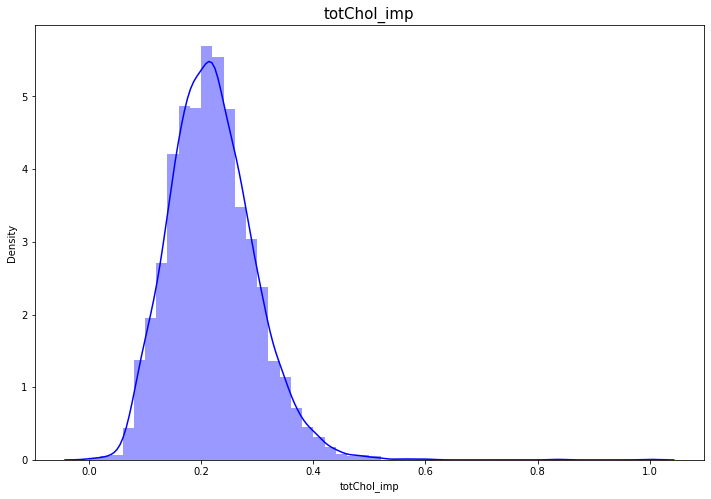

In [29]:
plt.figure(figsize= (12,8))
sns.distplot(scaled_df["totChol_imp"],color='blue') 
plt.title("totChol_imp",size = 15)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



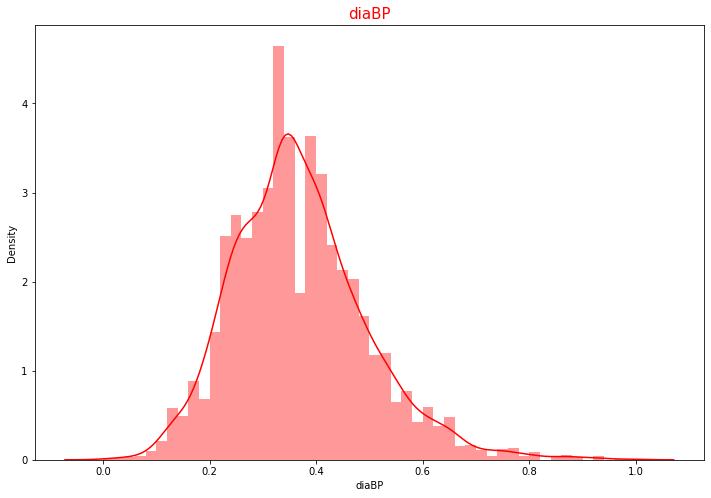

In [30]:
plt.figure(figsize= (12,8))
sns.distplot(scaled_df["diaBP"], color='red') 
plt.title("diaBP",size = 15, color='red')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



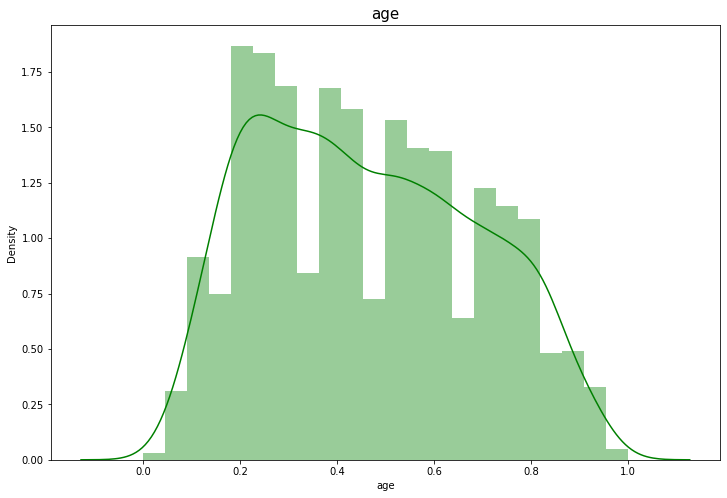

In [31]:
plt.figure(figsize= (12,8))
sns.distplot(scaled_df["age"],color='green') 
plt.title("age",size = 15)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



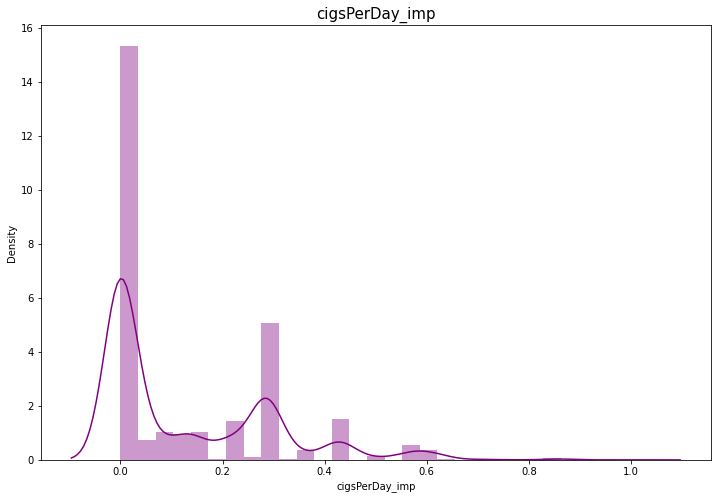

In [32]:
plt.figure(figsize= (12,8))
sns.distplot(scaled_df["cigsPerDay_imp"],color='purple') 
plt.title("cigsPerDay_imp",size = 15)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



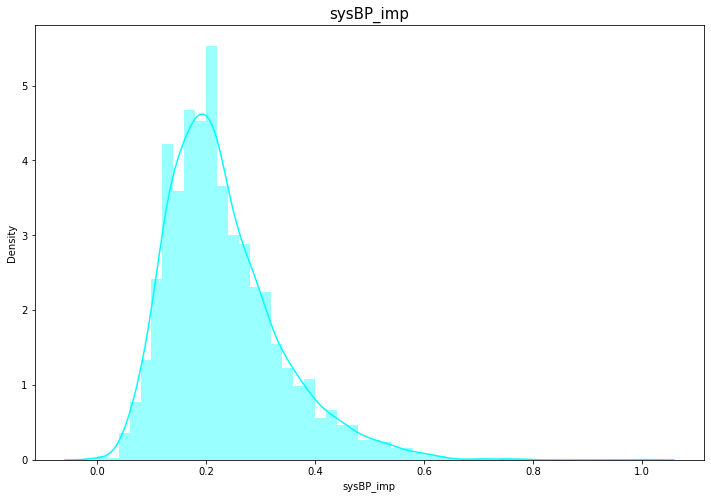

In [33]:
plt.figure(figsize= (12,8))
sns.distplot(scaled_df["sysBP_imp"],color='cyan') 
plt.title("sysBP_imp",size = 15)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



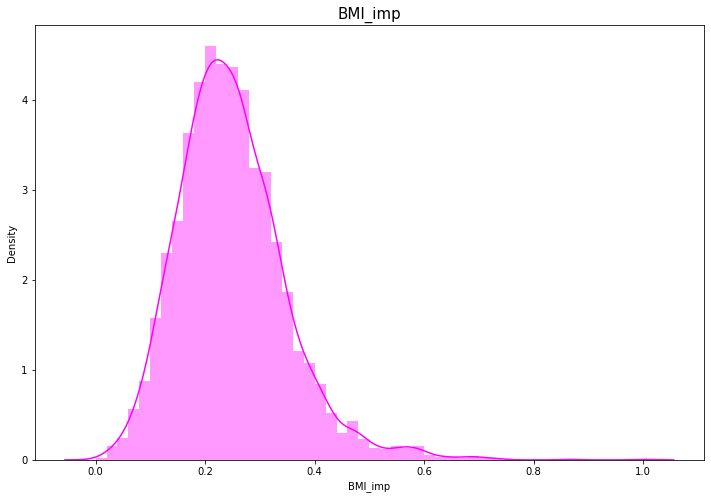

In [34]:
plt.figure(figsize= (12,8))
sns.distplot(scaled_df["BMI_imp"],color='magenta') 
plt.title("BMI_imp",size = 15)
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



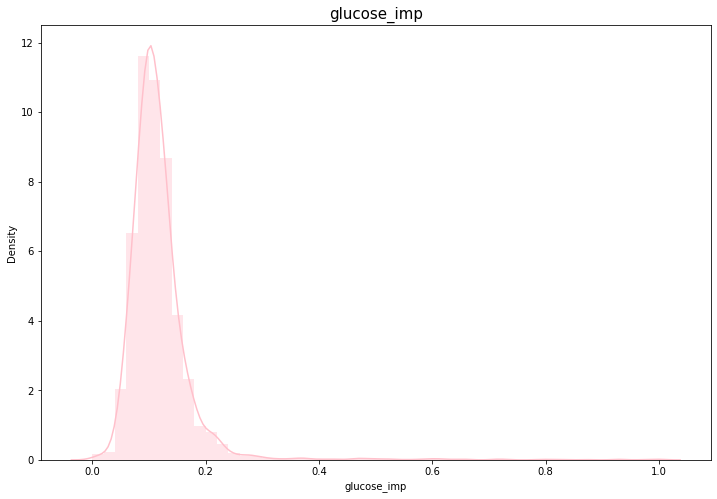

In [35]:
plt.figure(figsize= (12,8))
sns.distplot(scaled_df["glucose_imp"],color='pink') 
plt.title("glucose_imp",size = 15)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



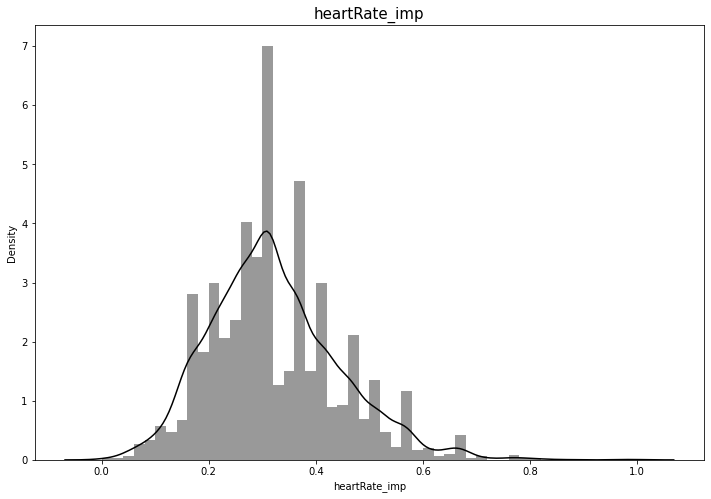

In [36]:
plt.figure(figsize= (12,8))
sns.distplot(scaled_df["heartRate_imp"], color='black') 
plt.title("heartRate_imp",size = 15)
plt.show()

# **Box Plots**

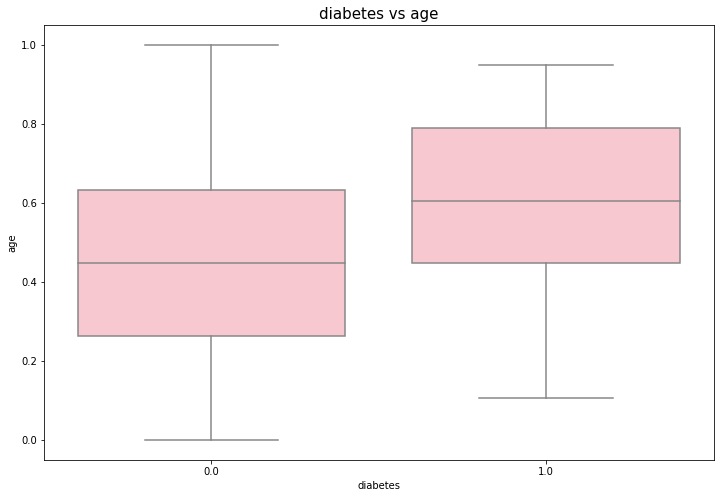

In [37]:
plt.figure(figsize= (12,8))
sns.boxplot(x= scaled_df["diabetes"], y= scaled_df["age"], color='pink')
plt.title("diabetes vs age",size = 15)
plt.show()

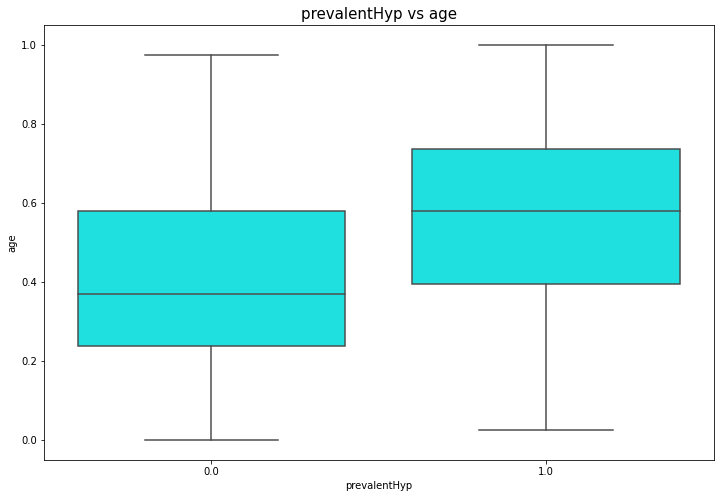

In [38]:
plt.figure(figsize= (12,8))
sns.boxplot(x= scaled_df["prevalentHyp"], y= scaled_df["age"], color='cyan')
plt.title("prevalentHyp vs age",size = 15)
plt.show()

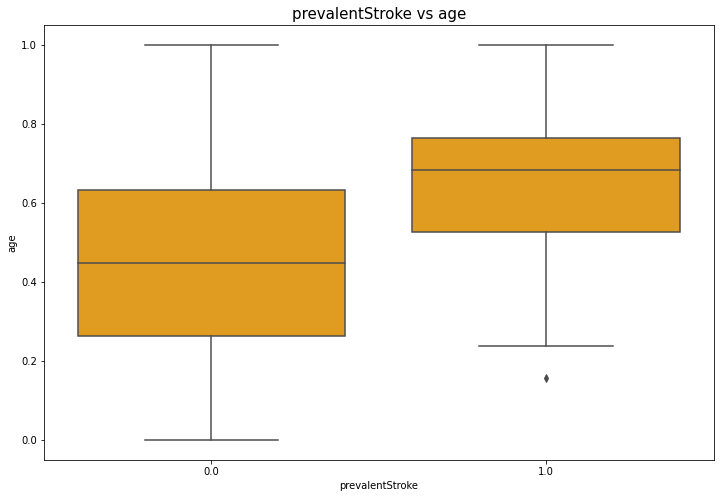

In [39]:
plt.figure(figsize= (12,8))
sns.boxplot(x= scaled_df["prevalentStroke"], y= scaled_df["age"], color='orange')
plt.title("prevalentStroke vs age",size = 15)
plt.show()

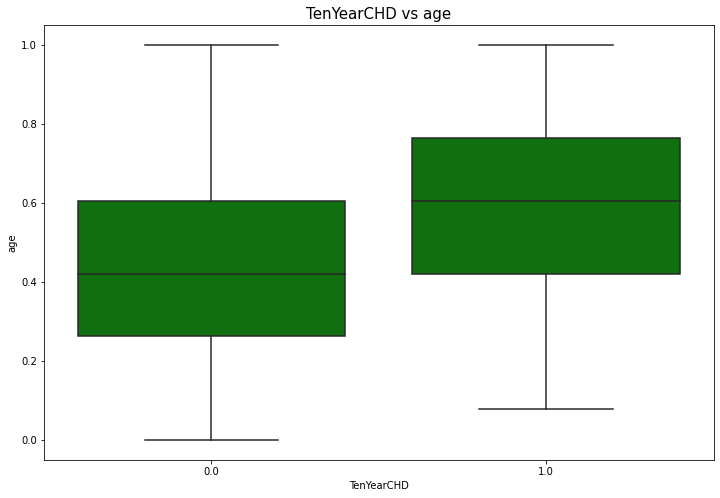

In [40]:
plt.figure(figsize= (12,8))
sns.boxplot(x= scaled_df["TenYearCHD"], y= scaled_df["age"],color='green')
plt.title("TenYearCHD vs age",size = 15)
plt.show()

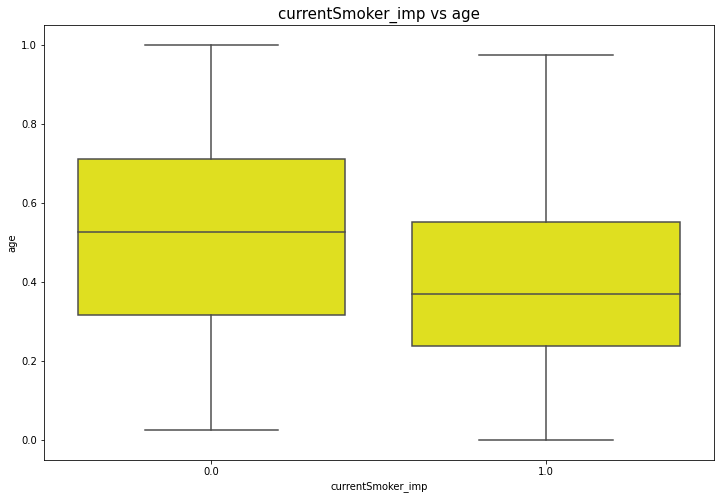

In [41]:
plt.figure(figsize= (12,8))
sns.boxplot(x= scaled_df["currentSmoker_imp"], y= scaled_df["age"], color='yellow')
plt.title("currentSmoker_imp vs age",size = 15)
plt.show()

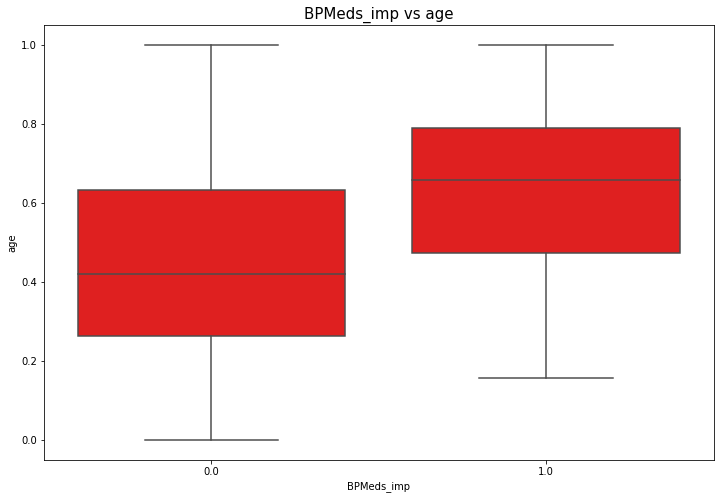

In [42]:
plt.figure(figsize= (12,8))
sns.boxplot(x= scaled_df["BPMeds_imp"], y= scaled_df["age"], color='red')
plt.title("BPMeds_imp vs age",size = 15)
plt.show()

# **Bar Plots**

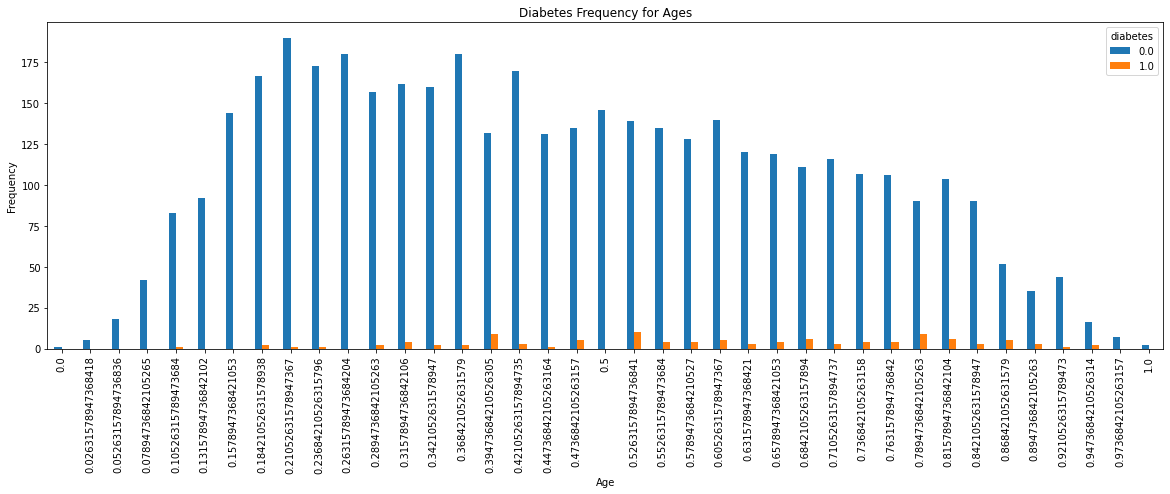

In [43]:
pd.crosstab(scaled_df.age,scaled_df.diabetes).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

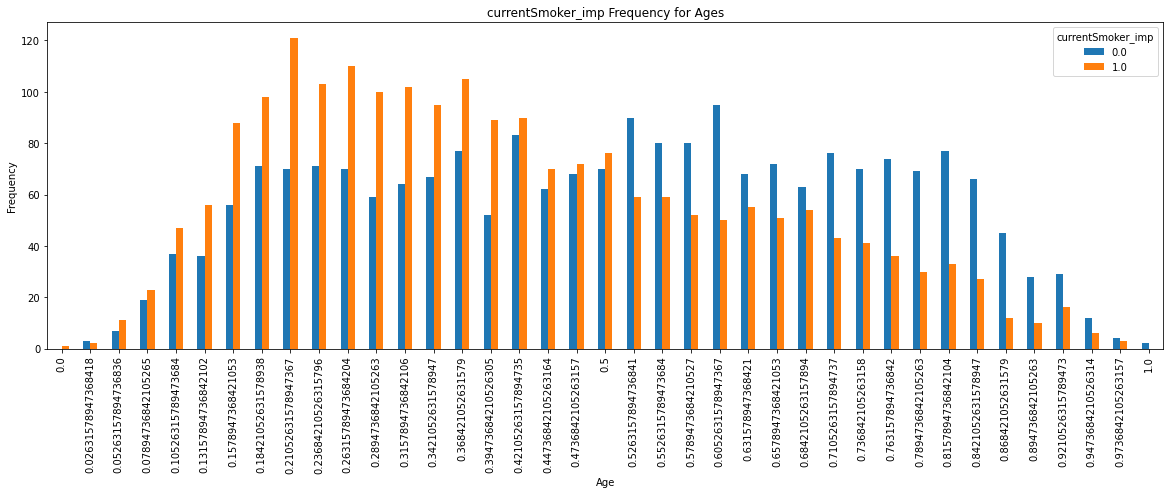

In [44]:
pd.crosstab(scaled_df.age,scaled_df.currentSmoker_imp).plot(kind="bar",figsize=(20,6))
plt.title('currentSmoker_imp Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

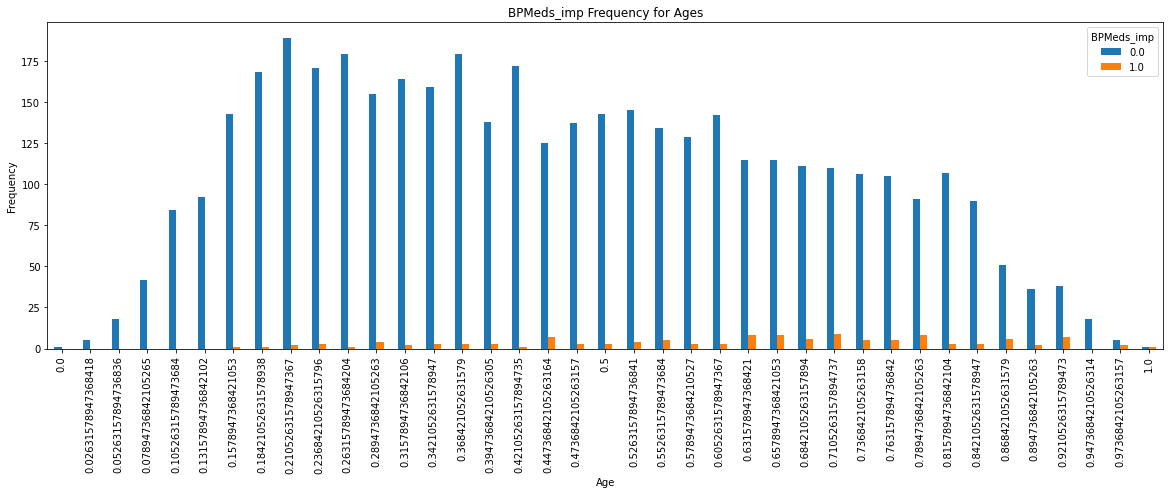

In [45]:
pd.crosstab(scaled_df.age,scaled_df.BPMeds_imp).plot(kind="bar",figsize=(20,6))
plt.title('BPMeds_imp Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

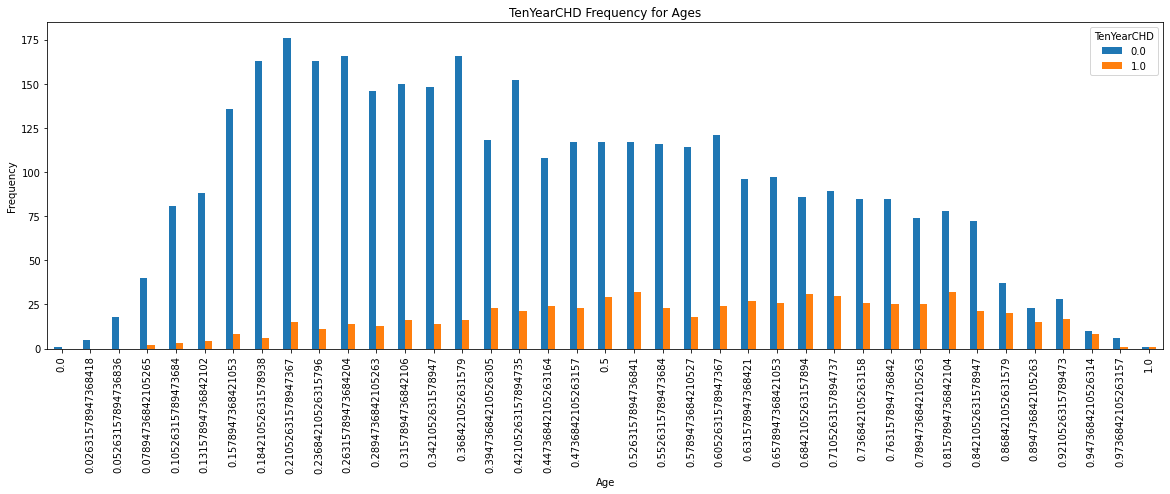

In [46]:
pd.crosstab(scaled_df.age,scaled_df.TenYearCHD).plot(kind="bar",figsize=(20,6))
plt.title('TenYearCHD Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

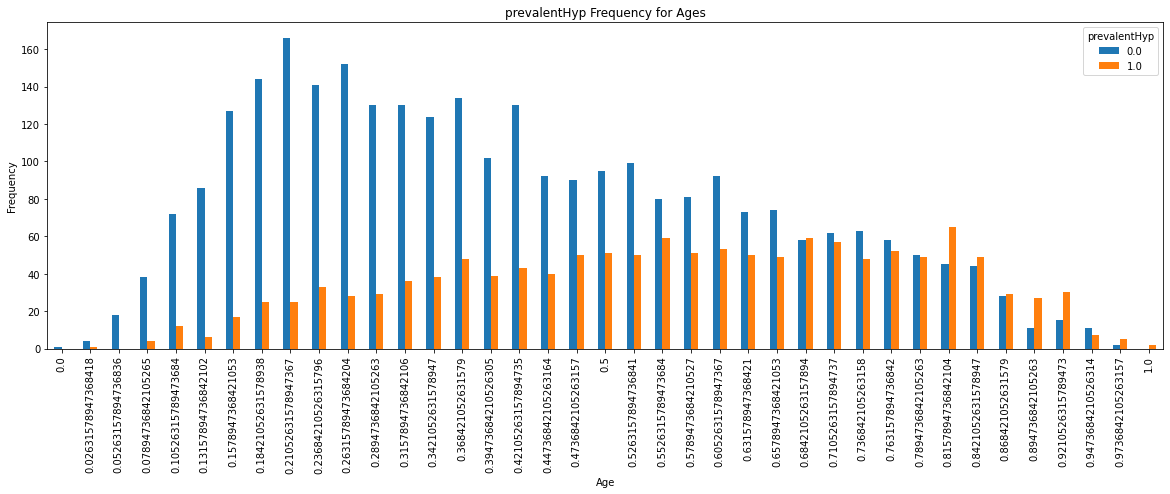

In [47]:
pd.crosstab(scaled_df.age,scaled_df.prevalentHyp).plot(kind="bar",figsize=(20,6))
plt.title('prevalentHyp Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

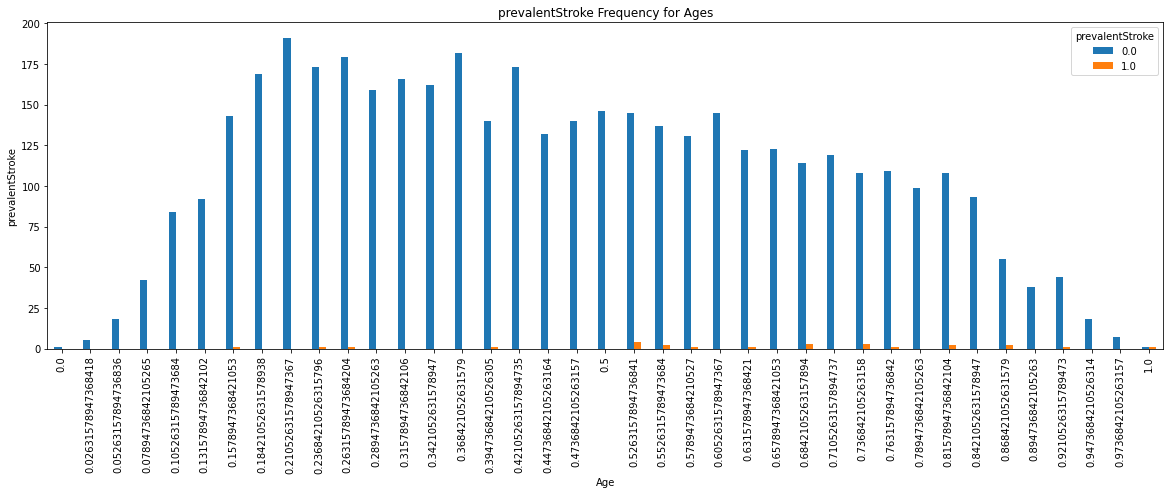

In [48]:
pd.crosstab(scaled_df.age,scaled_df.prevalentStroke).plot(kind="bar",figsize=(20,6))
plt.title('prevalentStroke Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('prevalentStroke')
plt.show()

# **Scatterplots** 

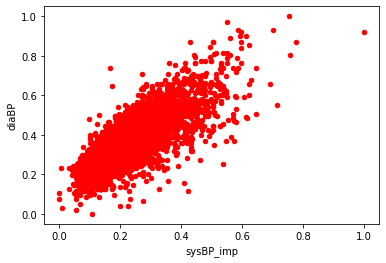

In [49]:
scaled_df.plot.scatter(x="sysBP_imp", y="diaBP", color='red')

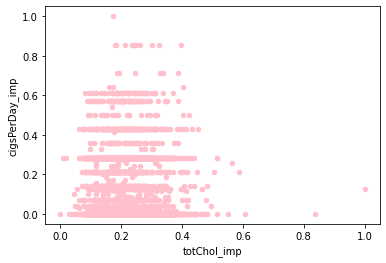

In [50]:
scaled_df.plot.scatter(x="totChol_imp", y="cigsPerDay_imp", color='pink')

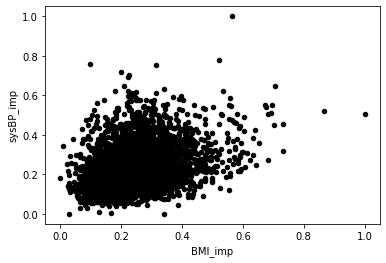

In [51]:
scaled_df.plot.scatter(x="BMI_imp", y="sysBP_imp", color='black')

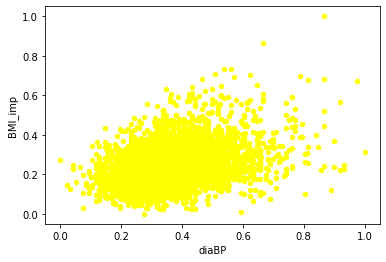

In [52]:
scaled_df.plot.scatter(x="diaBP", y="BMI_imp", color='yellow')

# **Outlier Detection**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



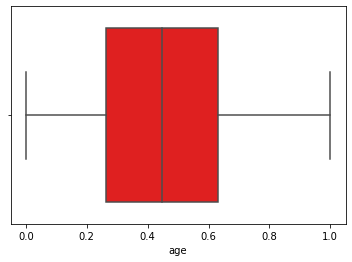

In [53]:
sns.boxplot(scaled_df["age"], color='red')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



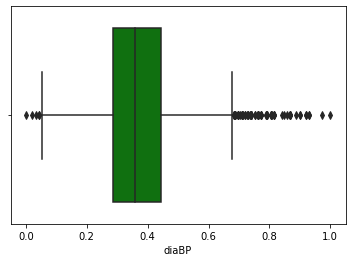

In [54]:
sns.boxplot(scaled_df["diaBP"], color='green')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



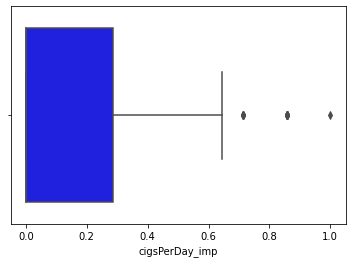

In [55]:
sns.boxplot(scaled_df["cigsPerDay_imp"], color='blue')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



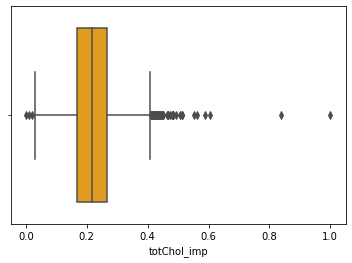

In [56]:
sns.boxplot(scaled_df["totChol_imp"], color='orange')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



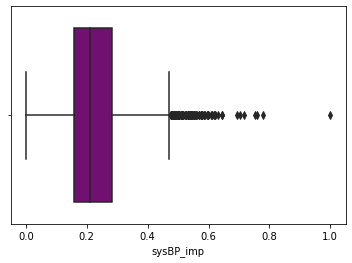

In [57]:
sns.boxplot(scaled_df["sysBP_imp"], color='purple')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



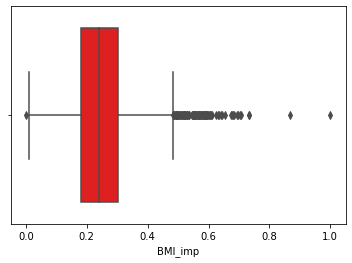

In [58]:
sns.boxplot(scaled_df["BMI_imp"], color='red') 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



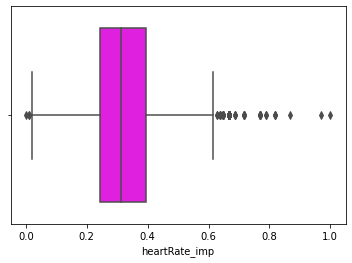

In [59]:
sns.boxplot(scaled_df["heartRate_imp"], color='magenta') 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



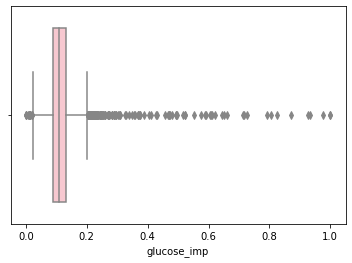

In [60]:
sns.boxplot(scaled_df["glucose_imp"], color='pink')

# **Outlier Removal**

In [61]:
print(scaled_df["diaBP"].quantile(0.10))
print(scaled_df["diaBP"].quantile(0.90))

0.2222222222222222
0.5291005291005291


In [62]:
scaled_df["diaBP"]= np.where(scaled_df["diaBP"] <0.22, 0.22,scaled_df["diaBP"])
scaled_df["diaBP"] = np.where(scaled_df["diaBP"] >0.529, 0.529,scaled_df["diaBP"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



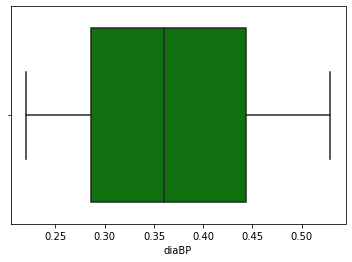

In [63]:
sns.boxplot(scaled_df["diaBP"], color='green')

In [64]:
print(scaled_df["cigsPerDay_imp"].quantile(0.10))
print(scaled_df["cigsPerDay_imp"].quantile(0.90))

0.0
0.35714285714285715


In [65]:
scaled_df["cigsPerDay_imp"]= np.where(scaled_df["cigsPerDay_imp"] <0.0, 0.0,scaled_df["cigsPerDay_imp"])
scaled_df["cigsPerDay_imp"] = np.where(scaled_df["cigsPerDay_imp"] >0.36, 0.36,scaled_df["cigsPerDay_imp"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



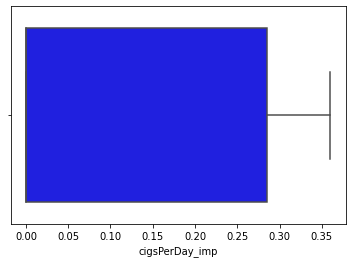

In [66]:
sns.boxplot(scaled_df["cigsPerDay_imp"], color='blue')

In [67]:

print(scaled_df["totChol_imp"].quantile(0.10))
print(scaled_df["totChol_imp"].quantile(0.90))


0.13022071307300517
0.3140916808149406


In [68]:
scaled_df["totChol_imp"]= np.where(scaled_df["totChol_imp"] <0.13, 0.13,scaled_df["totChol_imp"])
scaled_df["totChol_imp"] = np.where(scaled_df["totChol_imp"] >0.31, 0.31,scaled_df["totChol_imp"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



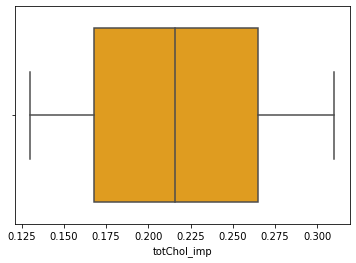

In [69]:
sns.boxplot(scaled_df["totChol_imp"], color='orange')

In [70]:
print(scaled_df["sysBP_imp"].quantile(0.10))
print(scaled_df["sysBP_imp"].quantile(0.90))

0.12056737588652477
0.37115839243498816


In [71]:
scaled_df["sysBP_imp"]= np.where(scaled_df["sysBP_imp"] <0.12, 0.12,scaled_df["sysBP_imp"])
scaled_df["sysBP_imp"] = np.where(scaled_df["sysBP_imp"] >0.37, 0.37,scaled_df["sysBP_imp"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



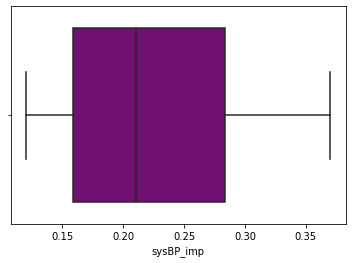

In [72]:
sns.boxplot(scaled_df["sysBP_imp"], color='purple')

In [73]:

print(scaled_df["BMI_imp"].quantile(0.10))
print(scaled_df["BMI_imp"].quantile(0.90))


0.13427047988366458
0.36912263693650027


In [74]:
scaled_df["BMI_imp"]= np.where(scaled_df["BMI_imp"] <0.134, 0.134,scaled_df["BMI_imp"])
scaled_df["BMI_imp"] = np.where(scaled_df["BMI_imp"] >0.369, 0.369,scaled_df["BMI_imp"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



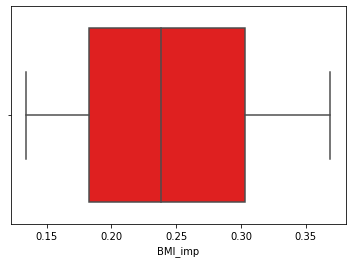

In [75]:
sns.boxplot(scaled_df["BMI_imp"], color='red') 

In [76]:

print(scaled_df["heartRate_imp"].quantile(0.10))
print(scaled_df["heartRate_imp"].quantile(0.90))


0.1616161616161616
0.4848484848484849


In [77]:
scaled_df["heartRate_imp"]= np.where(scaled_df["heartRate_imp"] <0.1616, 0.1616,scaled_df["heartRate_imp"])
scaled_df["heartRate_imp"] = np.where(scaled_df["heartRate_imp"] >0.4848, 0.4848,scaled_df["heartRate_imp"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



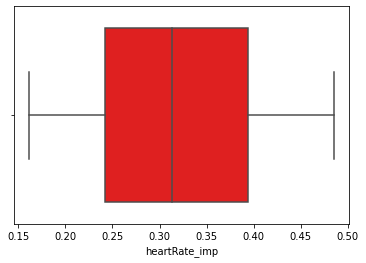

In [78]:
sns.boxplot(scaled_df["heartRate_imp"], color='red')

In [79]:

print(scaled_df["glucose_imp"].quantile(0.10))
print(scaled_df["glucose_imp"].quantile(0.90))

0.07062146892655367
0.1638418079096045


In [80]:
scaled_df["glucose_imp"]= np.where(scaled_df["glucose_imp"] <0.07, 0.07,scaled_df["glucose_imp"])
scaled_df["glucose_imp"] = np.where(scaled_df["glucose_imp"] >0.16, 0.16,scaled_df["glucose_imp"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



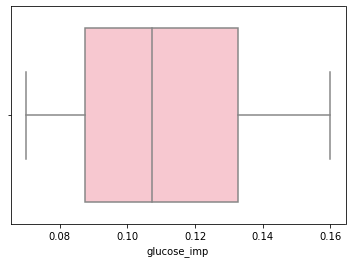

In [81]:
sns.boxplot(scaled_df["glucose_imp"], color='pink')

In [82]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)

    plt.show()
    


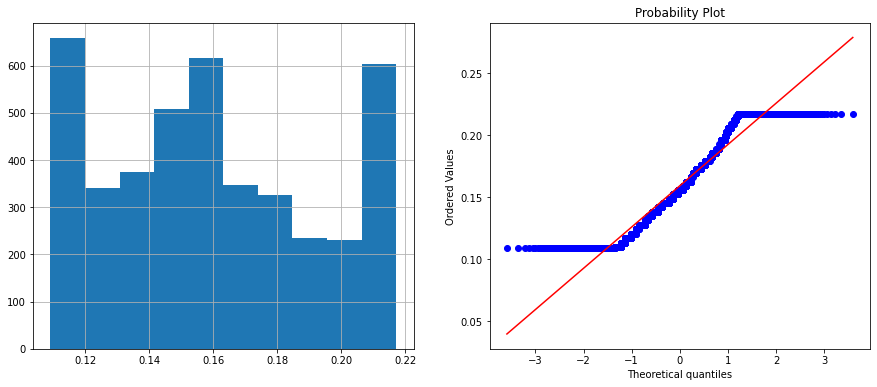

In [83]:

scaled_df['glucose_imp'] = scaled_df.glucose_imp**(1/1.2) 

diagnostic_plots(scaled_df, 'glucose_imp')

# **Exponential Transformation**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



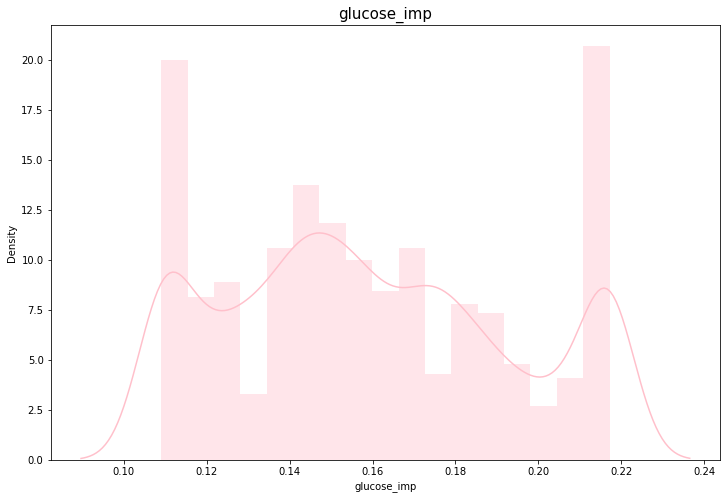

In [84]:
plt.figure(figsize= (12,8))
sns.distplot(scaled_df["glucose_imp"],color='pink') 
plt.title("glucose_imp",size = 15)
plt.show()

Optimal λ:  0.4457356307478773


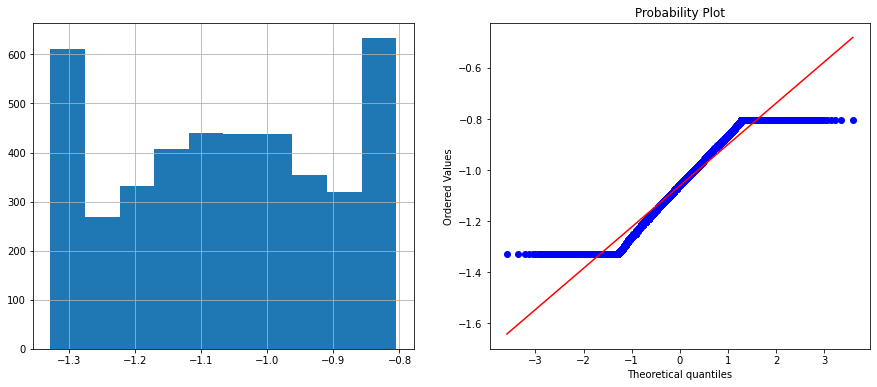

In [85]:
scaled_df['BMI_imp'], param = stats.boxcox(scaled_df.BMI_imp) 

print('Optimal λ: ', param)

diagnostic_plots(scaled_df, 'BMI_imp')

# **Box-Cox Transformation**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



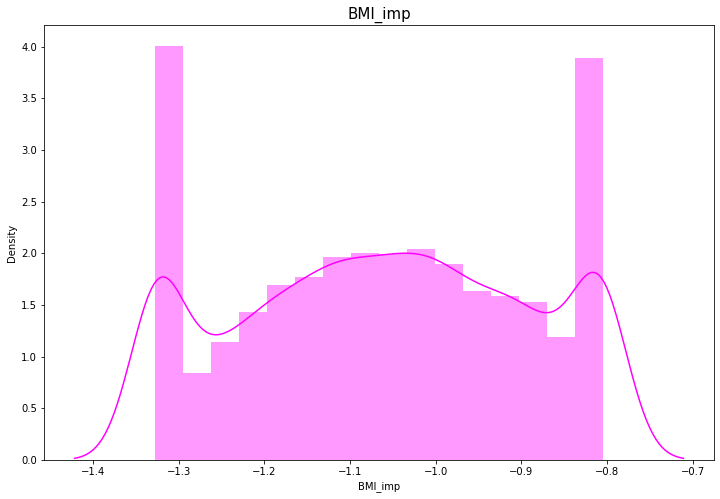

In [86]:
plt.figure(figsize= (12,8))
sns.distplot(scaled_df["BMI_imp"],color='magenta') 
plt.title("BMI_imp",size = 15)
plt.show()

# **TACKLING WITH CLASS IMBALANCE**

In [87]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.YlOrRd):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Target variable count')

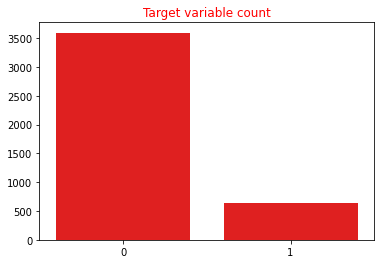

In [88]:
x=scaled_df['TenYearCHD'].value_counts().values
sns.barplot([0,1],x,color='red')
plt.title('Target variable count', color='red')

In [89]:
  
X = scaled_df.drop(['TenYearCHD'], axis=1)

y = scaled_df['TenYearCHD']

In [90]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# **LOGISTIC REGRESSION PERFORMING WELL ON IMBLANCED DATASET, FALLING INTO FASLE NEGATIVE TRAP**
# **WHAT WE SEE MIGHT NOT BE THE REAL THING...**

Confusion matrix, without normalization
[[1189    5]
 [ 195   10]]
Accuracy:  0.8570407433881344
Precision:  0.6666666666666666
Recall:  0.04878048780487805


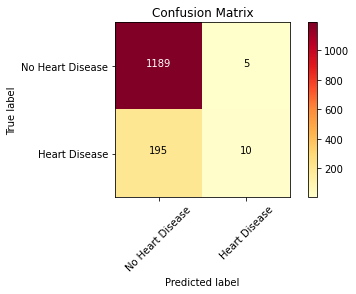

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train) 
predictions =model.predict(X_test)

cm_plot_labels = ['No Heart Disease','Heart Disease']
cm = confusion_matrix(y_true=y_test, y_pred=predictions)
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", precision_score(y_test, predictions))
print("Recall: ",recall_score(y_test, predictions))

# **LET'S APPLY NAIVE BAYES BEFORE CLASS IMBALANCE**
# **WE CANT TO GET THE INSIGHT TO DO THESE MODEL PEROFRM WELL AFTER THE CLASSES ARE BALANCED**


In [92]:
  
X = scaled_df.drop(['TenYearCHD'], axis=1)

y = scaled_df['TenYearCHD']
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

Confusion matrix, without normalization
[[1142   52]
 [ 170   35]]
Accuracy:  0.8413152251608291
Precision:  0.40229885057471265
Recall:  0.17073170731707318


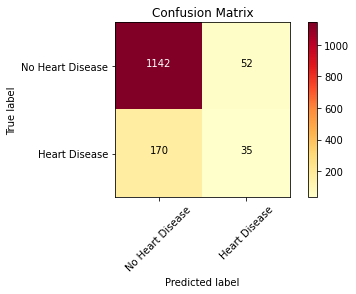

In [93]:
y_pred = gnb.predict(X_test)

y_pred

from sklearn.metrics import accuracy_score
cm_plot_labels = ['No Heart Disease','Heart Disease']
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ",recall_score(y_test, y_pred))

# **RANDOM FOREST WITH CLASS IMBALANCE**

Confusion matrix, without normalization
[[1142   52]
 [ 170   35]]
Accuracy:  0.8413152251608291
Precision:  0.40229885057471265
Recall:  0.17073170731707318


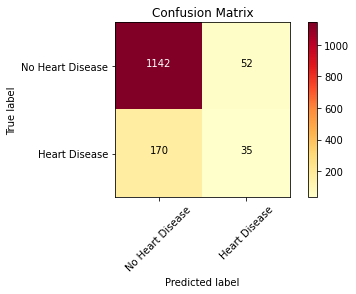

In [94]:
  
X = scaled_df.drop(['TenYearCHD'], axis=1)

y = scaled_df['TenYearCHD']
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# create the classifier with n_estimators = 100
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

y_pred = gnb.predict(X_test)

y_pred

# fit the model to the training set

clf.fit(X_train, y_train)
cm_plot_labels = ['No Heart Disease','Heart Disease']
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ",recall_score(y_test, y_pred))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



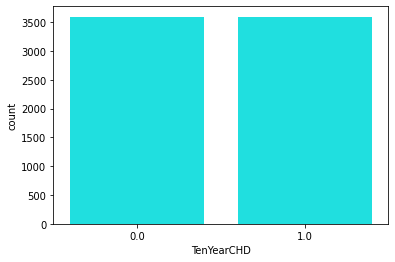

In [95]:
  
X = scaled_df.drop(['TenYearCHD'], axis=1)

y = scaled_df['TenYearCHD']

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
sns.countplot(y, color='cyan')



# **LOGISTIC REGRESSION AFTER CLASS IMBALANCE SHOWS THAT IT WAS ACTUALLY CLASSIFIYING FALSE NEGATIVES**

Confusion matrix, without normalization
[[784 427]
 [337 825]]
Accuracy:  0.6780446691951116
Precision:  0.6589456869009584
Recall:  0.7099827882960413


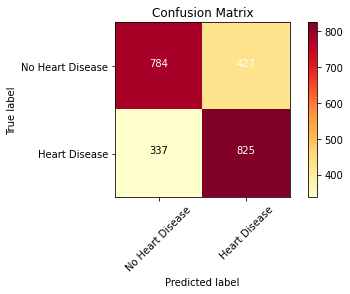

In [96]:
# split data into training and testing sets

  
X = scaled_df.drop(['TenYearCHD'], axis=1)

y = scaled_df['TenYearCHD']

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train) 
predictions =model.predict(X_test)

cm_plot_labels = ['No Heart Disease','Heart Disease']
cm = confusion_matrix(y_true=y_test, y_pred=predictions)
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", precision_score(y_test, predictions))
print("Recall: ",recall_score(y_test, predictions))


# **INSIGHT: NAIVE BAYES ALSO WAS CLASSIFYING FALSE NEGATIVES BEFORE CLASS BALANCING**

Confusion matrix, without normalization
[[784 427]
 [337 825]]
Accuracy:  0.6780446691951116
Precision:  0.6589456869009584
Recall:  0.7099827882960413


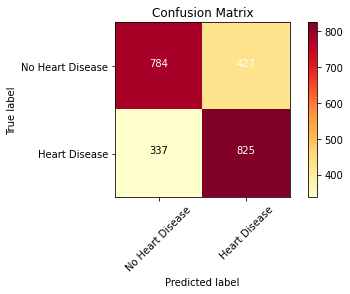

In [97]:
# split data into training and testing sets

  
X = scaled_df.drop(['TenYearCHD'], axis=1)

y = scaled_df['TenYearCHD']

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

y_pred

cm_plot_labels = ['No Heart Disease','Heart Disease']
cm = confusion_matrix(y_true=y_test, y_pred=predictions)
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", precision_score(y_test, predictions))
print("Recall: ",recall_score(y_test, predictions))

In [98]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

age                  0.142580
sysBP_imp            0.125613
BMI_imp              0.125569
totChol_imp          0.117666
diaBP                0.105226
heartRate_imp        0.104844
glucose_imp          0.100886
cigsPerDay_imp       0.053517
education_imp        0.045444
male                 0.020521
prevalentHyp         0.019677
currentSmoker_imp    0.013556
diabetes             0.010166
BPMeds_imp           0.009981
prevalentStroke      0.004753
dtype: float64

In [99]:
reduced_dataset=pd.concat([scaled_df['age'],scaled_df['BMI_imp'], scaled_df['totChol_imp'],scaled_df['diaBP'], scaled_df['sysBP_imp'],scaled_df['glucose_imp'], scaled_df['TenYearCHD']], axis=1)

In [100]:
y = np.array(scaled_df['TenYearCHD']).reshape(-1,1)
X = np.array(scaled_df[['male','age','prevalentStroke','prevalentHyp','diabetes','diaBP','education_imp','currentSmoker_imp','cigsPerDay_imp','BPMeds_imp','BMI_imp','glucose_imp','totChol_imp','sysBP_imp']]).reshape(-1,14)

# **LOGISTIC REGRESSION AFTER CLASS BALANCE**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



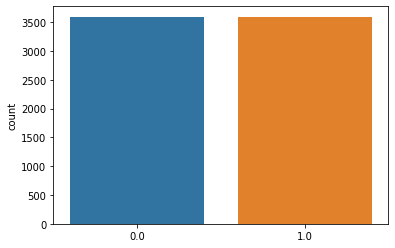

In [101]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
sns.countplot(y)


In [102]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Confusion matrix, without normalization
[[469 238]
 [247 484]]
Accuracy:  0.6627260083449235
Precision:  0.6703601108033241
Recall:  0.6621067031463749


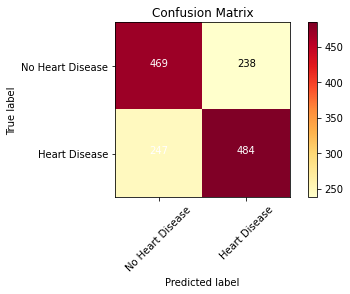

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
model = LogisticRegression(max_iter=300)
model.fit(x_train, y_train) 
predictions =model.predict(x_test)

cm_plot_labels = ['No Heart Disease','Heart Disease']
cm = confusion_matrix(y_true=y_test, y_pred=predictions)
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", precision_score(y_test, predictions))
print("Recall: ",recall_score(y_test, predictions))

# **Logistic Regression after CLASS BALANCE**

In [104]:
y = np.array(scaled_df['TenYearCHD']).reshape(-1,1)
X = np.array(scaled_df[['age','diaBP','glucose_imp','totChol_imp','sysBP_imp','BMI_imp']]).reshape(-1,6)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



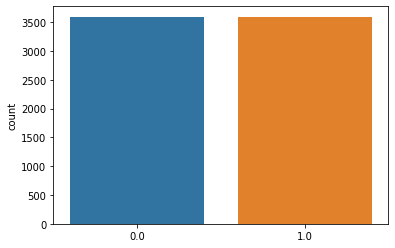

In [105]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
sns.countplot(y)



In [106]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Confusion matrix, without normalization
[[468 239]
 [240 491]]
Accuracy:  0.6668984700973575
Precision:  0.6726027397260274
Recall:  0.6716826265389877


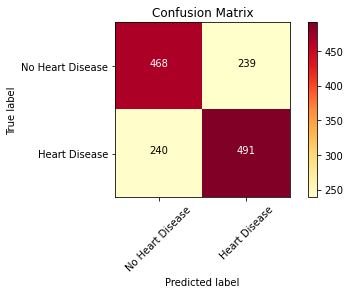

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
model = LogisticRegression(max_iter=300)
model.fit(x_train, y_train) 
predictions =model.predict(x_test)

cm_plot_labels = ['No Heart Disease','Heart Disease']
cm = confusion_matrix(y_true=y_test, y_pred=predictions)
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", precision_score(y_test, predictions))
print("Recall: ",recall_score(y_test, predictions))

# **Random Forest Classifier withstood the WEATHERING BY SMOTE**

In [110]:
y = np.array(scaled_df['TenYearCHD']).reshape(-1,1)
X = np.array(scaled_df[['male','age','prevalentStroke','prevalentHyp','diabetes','diaBP','education_imp','currentSmoker_imp','cigsPerDay_imp','BPMeds_imp','BMI_imp','glucose_imp','totChol_imp','sysBP_imp']]).reshape(-1,14)

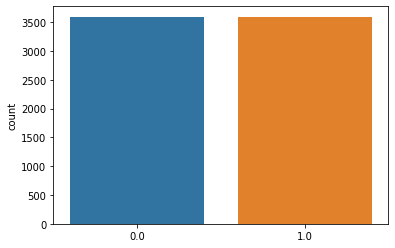

In [111]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
sns.countplot(y)

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [113]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [114]:
y_pred = model.predict(X_test)

In [115]:
cm_plot_labels = ['No Heart Disease','Heart Disease']

In [116]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

Confusion matrix, without normalization
[[897 164]
 [186 910]]
Accuracy:  0.837737598516458
Precision:  0.8472998137802608
Recall:  0.8302919708029197


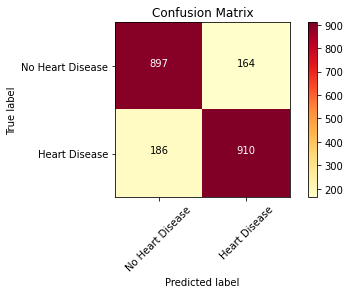

In [117]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ",recall_score(y_test, y_pred))

In [118]:
reduced_dataset=pd.concat([scaled_df['age'],scaled_df['BMI_imp'], scaled_df['totChol_imp'],scaled_df['diaBP'], scaled_df['sysBP_imp'],scaled_df['glucose_imp'], scaled_df['TenYearCHD']], axis=1)

In [119]:
y = np.array(reduced_dataset['TenYearCHD']).reshape(-1,1)
X = np.array(reduced_dataset[['age','diaBP','glucose_imp','totChol_imp','sysBP_imp','BMI_imp']]).reshape(-1,6)

In [120]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



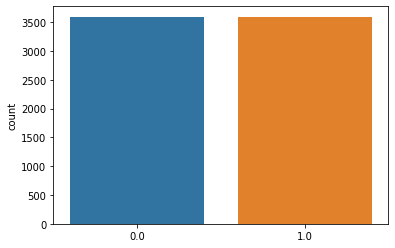

In [121]:
sns.countplot(y)

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [123]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [124]:
y_pred = model.predict(X_test)

In [125]:
cm_plot_labels = ['No Heart Disease','Heart Disease']

In [126]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

Confusion matrix, without normalization
[[914 146]
 [224 873]]
Accuracy:  0.828465461288827
Precision:  0.8567222767419038
Recall:  0.7958067456700091


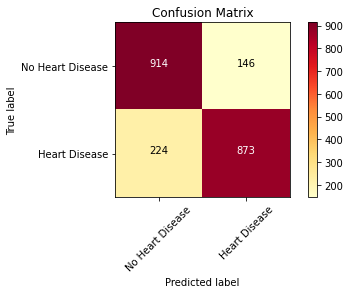

In [127]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ",recall_score(y_test, y_pred))

# **Random Classifier with reduced dataset**

In [128]:
y = np.array(scaled_df['TenYearCHD']).reshape(-1,1)
X = np.array(scaled_df[['age','diaBP','glucose_imp','totChol_imp','sysBP_imp','BMI_imp']]).reshape(-1,6)

In [129]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



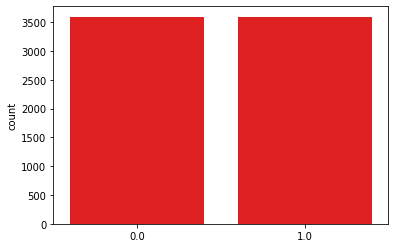

In [130]:
sns.countplot(y, color='red')

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [132]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [133]:
y_pred = model.predict(X_test)

Confusion matrix, without normalization
[[911 148]
 [204 894]]
Accuracy:  0.836810384793695
Precision:  0.8579654510556622
Recall:  0.8142076502732241


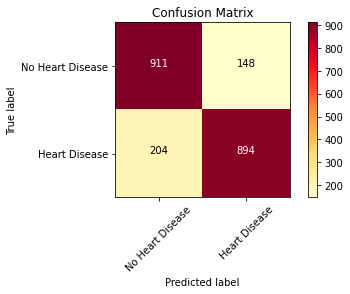

In [134]:
cm_plot_labels = ['No Heart Disease','Heart Disease']
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
true_pos = np.diag(cm)

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ",recall_score(y_test, y_pred))

# **SINCE KNN IS ALSO USED FOR CLASSIFICATION, WE CAN DROP THE TARGET VARIABLE AND THE APPLY KNN CLUSTERING FOR HEART DISEASE CLASSIFICATION IN AN UNSUPERVISED MANNER**.

In [135]:
from sklearn.model_selection import train_test_split
np.random.seed(123)
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import missingno as mno
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from time import perf_counter, sleep

from sklearn.decomposition import PCA

reduced_dataset.info()
reduced_dataset=reduced_dataset.astype('int64')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          4238 non-null   float64
 1   BMI_imp      4238 non-null   float64
 2   totChol_imp  4238 non-null   float64
 3   diaBP        4238 non-null   float64
 4   sysBP_imp    4238 non-null   float64
 5   glucose_imp  4238 non-null   float64
 6   TenYearCHD   4238 non-null   float64
dtypes: float64(7)
memory usage: 231.9 KB


In [136]:
features = reduced_dataset.iloc[:, 0:6]

/usr/local/lib/python3.8/dist-packages/yellowbrick/cluster/elbow.py:339: ConvergenceWarning:

Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.

/usr/local/lib/python3.8/dist-packages/yellowbrick/cluster/elbow.py:339: ConvergenceWarning:

Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.

/usr/local/lib/python3.8/dist-packages/yellowbrick/cluster/elbow.py:339: ConvergenceWarning:

Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.

/usr/local/lib/python3.8/dist-packages/yellowbrick/cluster/elbow.py:339: ConvergenceWarning:

Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.

/usr/local/lib/python3.8/dist-packages/yellowbrick/cluster/elbow.py:339: ConvergenceWarning:

Number of distinct clusters (4) found smaller than n_clusters (9). Possibly due to duplicate points in

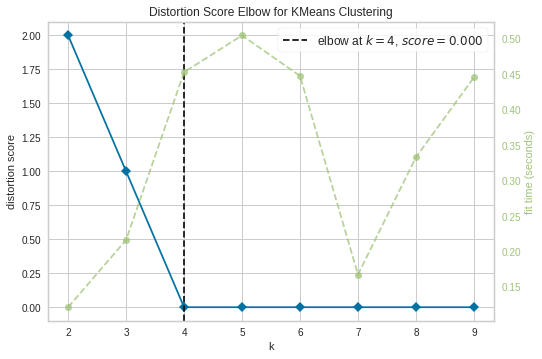

In [137]:
target = reduced_dataset.iloc[:, -6]

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))

visualizer.fit(features)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [138]:
for i in range(2,5):
    labels=KMeans(n_clusters=i,init="k-means++",random_state=200).fit(reduced_dataset).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(reduced_dataset,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.7853400443109984
Silhouette score for k(clusters) = 3 is 0.9247466666666667
Silhouette score for k(clusters) = 4 is 1.0


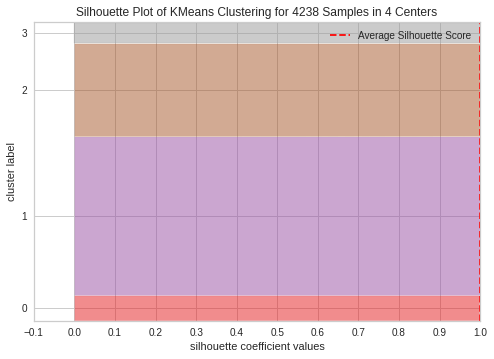

In [139]:

from yellowbrick.cluster import InterclusterDistance, KElbowVisualizer, SilhouetteVisualizer
# Instantiate the clustering model and visualizer 
model = KMeans(4)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(reduced_dataset)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

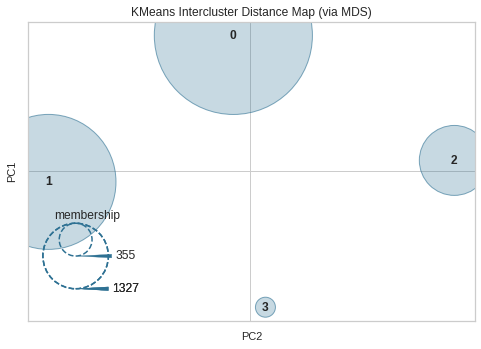

In [140]:
model = KMeans(4)
visualizer = InterclusterDistance(model)

visualizer.fit(reduced_dataset)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [141]:
import pandas_profiling
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.graph_objs as go
import plotly as py
# pandas_profiling.ProfileReport(dfskills)

In [142]:
corr = reduced_dataset.corr()
trace = go.Heatmap(z=corr,x=corr.index,y=corr.columns)
data = [trace]
layout = dict(title="Heart Disease")
fig = dict(data=data, layout=layout)
#iplot(fig)

In [143]:
from sklearn.decomposition import PCA
pca = PCA().fit(reduced_dataset)

In [144]:
pcaratio = pca.explained_variance_ratio_
trace = go.Scatter(x=np.arange(len(pcaratio)),y=np.cumsum(pcaratio))
data = [trace]
layout = dict(title="Heart Disease Dataset - PCA Explained Variance ")
fig = dict(data=data, layout=layout)
#iplot(fig)

In [146]:
pca = PCA(n_components=2)
skillsPCA = pca.fit_transform(reduced_dataset)

In [147]:
kmeans = KMeans(n_clusters=4)
skillsPCA_labels = kmeans.fit_predict(skillsPCA)

In [148]:
dfskillsPCA = pd.DataFrame(skillsPCA)
dfskillsPCA['cluster'] = skillsPCA_labels

In [149]:
from sklearn.manifold import TSNE
X = dfskillsPCA.iloc[:,:-1]
Xtsne = TSNE(n_components=2).fit_transform(X)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = skillsPCA_labels
dftsne.columns = ['x1','x2','cluster']


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [150]:
pca2 = PCA(n_components=2)
skillsPCA2 = pca2.fit_transform(reduced_dataset)
dfskillsPCA2 = pd.DataFrame(skillsPCA2)
dfskillsPCA2['cluster'] = skillsPCA_labels
dfskillsPCA2.columns = ['x1','x2','cluster']

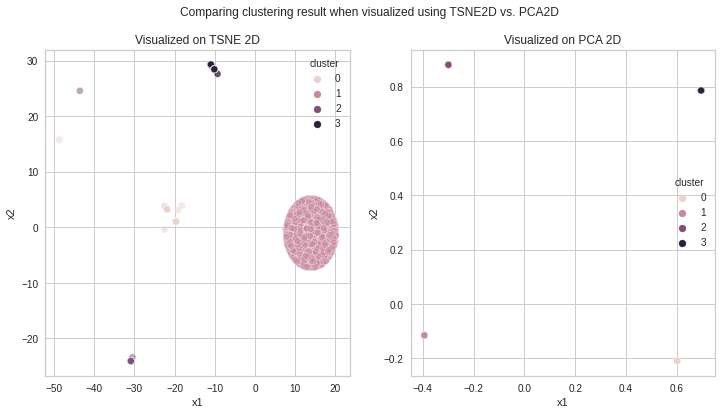

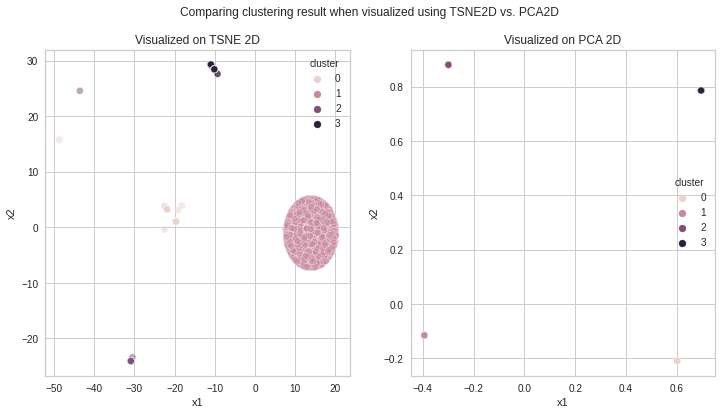

In [151]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[0])
ax[0].set_title('Visualized on TSNE 2D')
sns.scatterplot(data=dfskillsPCA2,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[1])
ax[1].set_title('Visualized on PCA 2D')
fig.suptitle('Comparing clustering result when visualized using TSNE2D vs. PCA2D')
display(fig)